# with this code, we estimate the price of a call option on ITSA4, maturity of 1 year using MonteCarlo - Euler Discretization.

In [62]:
import numpy as np
import pandas as pd 
from pandas_datareader import data as wb
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
data = pd.read_csv('ITSA4.csv', index_col = 'Date')

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 6/22/15 to 6/19/20
Data columns (total 1 columns):
ITSA4    1241 non-null float64
dtypes: float64(1)
memory usage: 19.4+ KB


In [65]:
data.head()

,ITSA4
Date,
6/22/15,5.233504
6/23/15,5.233504
6/24/15,5.221835
6/25/15,5.134320
6/26/15,5.245173


In [66]:
data.tail()

,ITSA4
Date,
6/15/20,9.56
6/16/20,9.76
6/17/20,9.93
6/18/20,10.25
6/19/20,10.41


In [67]:
log_returns = np.log(1 + data.pct_change())

log_returns

,ITSA4
Date,
6/22/15,NaN
6/23/15,0.000000
6/24/15,-0.002232
6/25/15,-0.016901
6/26/15,0.021361
...,...
6/15/20,-0.023774
6/16/20,0.020705
6/17/20,0.017268


In [68]:
stdev = log_returns.std() * 250 ** 0.5

stdev

ITSA4    0.326442
dtype: float64

# # risk-free is defined as Brazil 10Y Bond Yield, 6.92% at 06/24/2020. Strike is 12 Brazilian reais. 

In [69]:
r = 0.0692

In [70]:
stdev = stdev.values

stdev

array([0.32644151])

In [71]:
T = 1.0
t_intervals = 250
delta_t = T / t_intervals

iterations = 10000

In [72]:
Z = np.random.standard_normal((t_intervals + 1, iterations))

In [73]:
S = np.zeros_like(Z)

In [74]:
S0 = data.iloc[-1]

S[0] = S0

# on the next lines of code we create a loop with the range (1, t_iterations + 1) that reassigns values to S in time t 

$$
S_t = S_{t-1} \cdot exp((r - 0.5 \cdot stdev^2) \cdot delta_t + stdev \cdot delta_t^{0.5} \cdot Z_t)
$$


In [75]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])
S

array([[10.41      , 10.41      , 10.41      , ..., 10.41      ,
        10.41      , 10.41      ],
       [10.31164688, 10.57668421, 10.5296672 , ..., 10.10826329,
        10.55241057, 10.51689493],
       [10.40704651, 10.78047034, 10.46701228, ...,  9.81703272,
        10.59367008, 10.66963469],
       ...,
       [21.01885093, 15.82407315,  8.50147893, ...,  6.10793155,
         8.57599539, 18.13668469],
       [21.280076  , 16.29889887,  8.50265424, ...,  6.02086572,
         8.41347918, 18.22630942],
       [21.03427449, 16.49626401,  8.33516711, ...,  5.84000987,
         8.37010207, 18.0987331 ]])

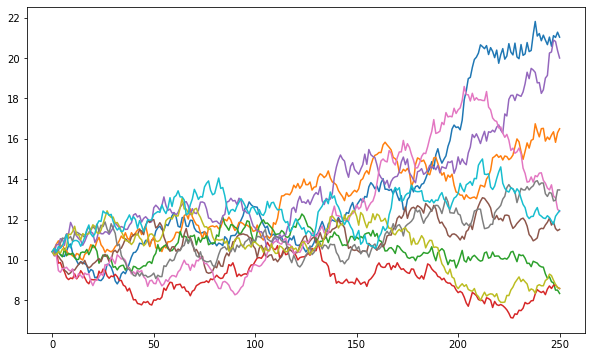

In [76]:
plt.figure(figsize=(10, 6))

plt.plot(S[:, :10]);

In [77]:
P = np.maximum(S[-1] - 12, 0)

P

array([9.03427449, 4.49626401, 0.        , ..., 0.        , 0.        ,
       6.0987331 ])

In [78]:
P.shape

(10000,)

In [79]:
c = np.exp(-r * T) * np.sum(P) / iterations

c

1.0464189865938063